# Проект

<b>Описание проекта:</b> Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Основная задача — провести анализ и подготовить план действий по удержанию клиентов.

<b>Цель:</b> построить модель по предсказанию факта оттока клиентов на основании их активности, пола, местоположения рядом с фитнес-клубом и другими параметрами.
<p>
    <b>Для достижения поставленной цели были сформулированы следующие задачи:</b> <p>
1. Загрузить данные клиентской базы.<p>
2. Подготовить данные (проверить наличие пропусков, аномалий).<p>
3. Провести исследовательский анализ данных.<p>
4. Построить модель прогнозирования оттока клиентов (задача: классификация (обучение с учителем)).<p>
5. Оценить модель по качеству предсказания модели.<p>
5. Сделать кластеризацию данных.<p>
6. Сформулировать выводы и сделать базовые рекомендации по работе с клиентами.<p>

# Описание датафрейма

Данные клиента за предыдущий до проверки факта оттока месяц:<p>
<b>'gender'</b> — пол;<p>
<b>'Near_Location'</b> — проживание или работа в районе, где находится фитнес-центр;<p>
<b>'Partner'</b> — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);<p>
<b>Promo_friends</b> — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);<p>
<b>'Phone'</b> — наличие контактного телефона;<p>
<b>'Age'</b> — возраст;<p>
<b>'Lifetime'</b> — время с момента первого обращения в фитнес-центр (в месяцах).<p>
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:<p>
<b>'Contract_period'</b> — длительность текущего действующего абонемента (месяц, 6 месяцев, год);<p>
<b>'Month_to_end_contract'</b> — срок до окончания текущего действующего абонемента (в месяцах);<p>
<b>'Group_visits'</b> — факт посещения групповых занятий;<p>
<b>'Avg_class_frequency_total'</b> — средняя частота посещений в неделю за все время с начала действия абонемента;<p>
<b>'Avg_class_frequency_current_month'</b> — средняя частота посещений в неделю за предыдущий месяц;<p>
<b>'Avg_additional_charges_total'</b> — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.<p>
<b>'Churn'</b> — факт оттока в текущем месяце.<p>

<div class="alert alert-block alert-success"; style="border-left: 6px solid green">
<b>Успех ✔️</b>
       
Хорошее введение!
    
</div>


## Подготовка данных и проверка на пропуски, дубликаты

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import itertools

In [29]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [30]:
df.columns = [i.lower() for i in df.columns]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

Пропусков нет! Число наблюдений больше 1000, следовательно, можно применить машинное обучение.

In [32]:
df.duplicated().sum() #число дубликатов

0

In [33]:
df[['gender', 'near_location', 'phone', 'age', 'avg_additional_charges_total', 'churn']].duplicated().sum() #усиленный поиск дубликатов

0

Дубликатов нет!

In [34]:
for i in df.columns:
    print(df[i].value_counts())

1    2041
0    1959
Name: gender, dtype: int64
1    3381
0     619
Name: near_location, dtype: int64
0    2053
1    1947
Name: partner, dtype: int64
0    2766
1    1234
Name: promo_friends, dtype: int64
1    3614
0     386
Name: phone, dtype: int64
1     2207
12     960
6      833
Name: contract_period, dtype: int64
0    2351
1    1649
Name: group_visits, dtype: int64
29    468
30    457
28    447
31    434
27    378
32    364
26    300
33    253
25    231
34    174
24    148
35     98
23     82
36     48
22     33
37     29
21     24
20     14
38     10
39      3
18      2
19      2
41      1
Name: age, dtype: int64
89.952762     1
174.658455    1
122.765563    1
204.444527    1
50.813166     1
             ..
272.997181    1
115.130268    1
133.525137    1
201.447650    1
218.979321    1
Name: avg_additional_charges_total, Length: 4000, dtype: int64
1.0     2207
6.0      645
12.0     524
11.0     181
5.0      130
10.0      82
9.0       73
4.0       58
8.0       38
7.0       25
3.0   

Аномалий нет!

## Исследовательский анализ данных (EDA) 

### Исследование признаков 

In [35]:
df.describe() #описание данных

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


### Средние значения признаков в зависимости от факта оттока клиентов

In [36]:
df.groupby('churn').agg({'mean'}) #группировка по churn и расчет средний значений признаков

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### Распределения признаков в зависимости от факта оттока клиентов

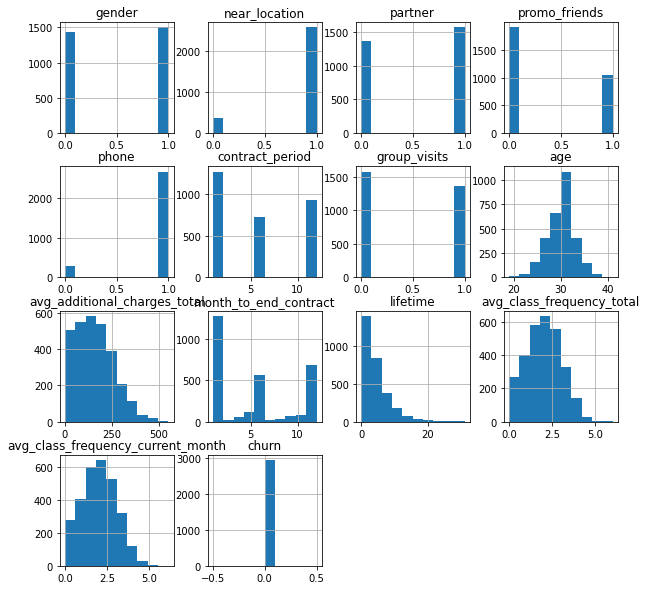

In [10]:
df_churn_0 = df.query("churn == 0").hist(figsize=(10,10)) #гистограмма признаков, когда churn = 0

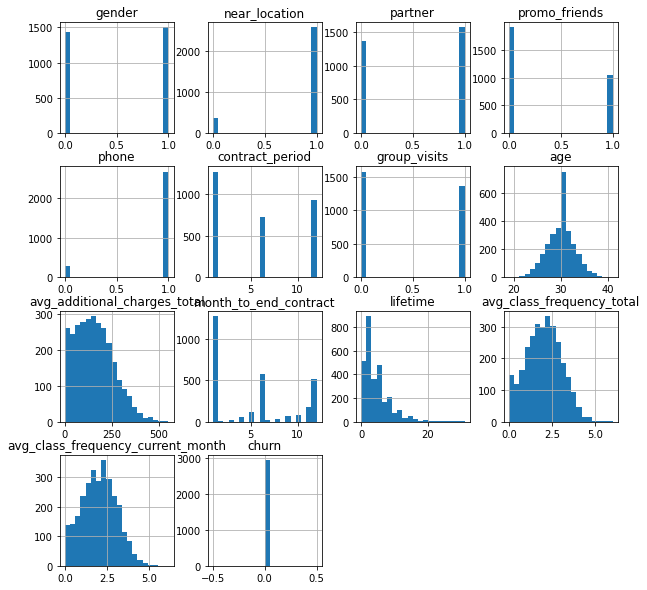

In [11]:
df_churn_0 = df.query("churn == 0").hist(figsize=(10,10), bins=20) 

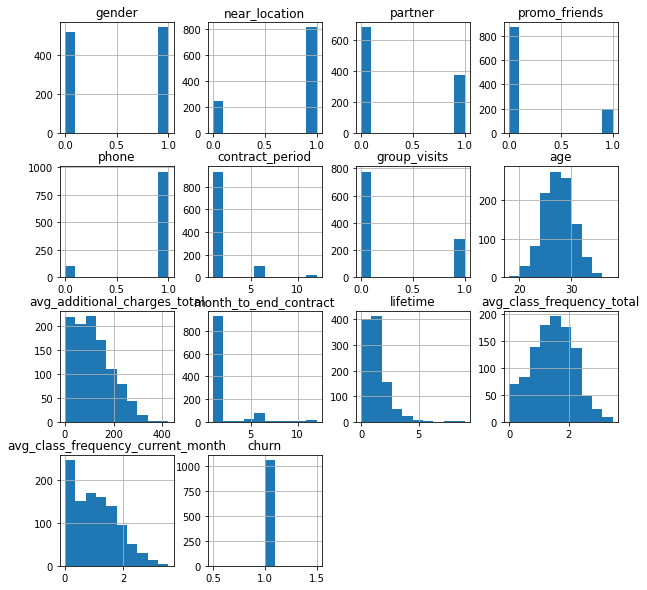

In [12]:
df_churn_1 = df.query("churn == 1").hist(figsize=(10,10)) #гистограмма признаков, когда churn = 1

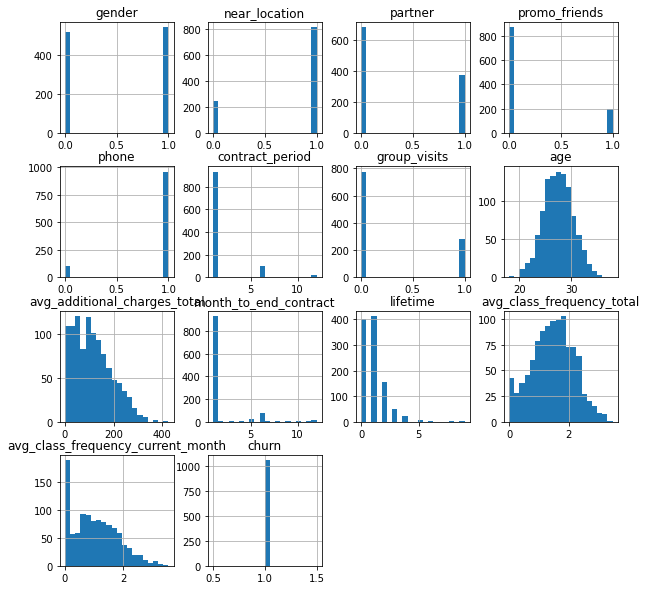

In [13]:
df_churn_1 = df.query("churn == 1").hist(figsize=(10,10), bins=20) #ушли

При разделении данных по наличию оттока клиентов распределение большинства признаков схожее. Например, avg_additional_charges, avg_frequency_total, gender, near_location. Имеется распределение Пуассона и нормальное распределениею

### Матрица корреляций признаков 

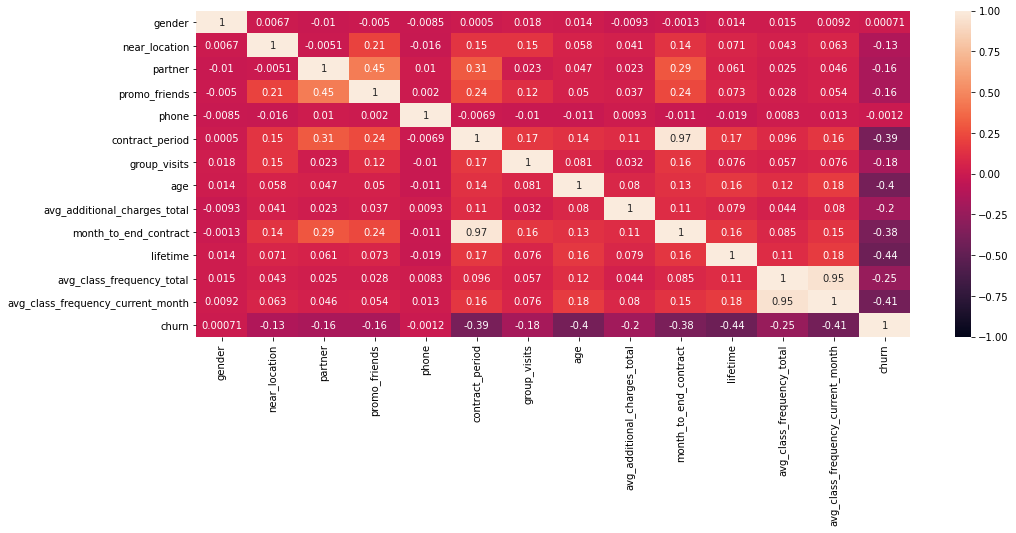

In [14]:
corrs = df.corr()
plt.figure(figsize=(16, 6))
sns.heatmap(corrs, vmin=-1, vmax=1, annot=True)
plt.show()

Целевая переменная 'churn' лучше всего коррелирует с признаками: avg_class_frequency_current_month, lifetime, age. Однако, они достаточно слабые.

## Модель прогнозирования оттока клиентов 

###  Подготовка тренировочной и валидационной выборок

In [15]:
X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

### Обучение моделей

In [16]:
models = [
    LogisticRegression(random_state=0, solver='liblinear'),
    RandomForestClassifier(random_state=0)
]

In [17]:
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f} Roc_auc_score:{:.2f} '.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
            roc_auc_score(y_test, y_pred)
            
        )
    )

### Сравнение моделей 

In [18]:
for i in models:
    print(i)
    make_prediction(i, X_train, y_train, X_test, y_test)

LogisticRegression(random_state=0, solver='liblinear')
Accuracy:0.93 Precision:0.86 Recall:0.83 Roc_auc_score:0.90 
RandomForestClassifier(random_state=0)
Accuracy:0.92 Precision:0.84 Recall:0.82 Roc_auc_score:0.88 


Обе модели предсказывают факт оттока клиентов практически одинаково, но LogisticRegression немного лучше

## Кластеризация клиентов 

### Стандартизация данных 

In [19]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

### Построение матрицы расстояний 

In [ ]:
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Матрица расстояний для клиентской базы')
plt.show()

Оптимальное число кластеров - 4

### Обучение модели кластеризации 

In [ ]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(X_sc)

### Расчет средних значений признаков по кластерам 

In [ ]:
df['cluster_km'] = labels
print(df.drop('churn', axis=1).groupby('cluster_km').agg('mean'))

Среднее значение признака near_location у кластера № 2 отличается от остальных кластеров очень сильно. Среднее значение признака partner у кластера № 0 отличается от остальных кластеров чуть больше.  Среднее значение признака promo_friends у кластера № 2 отличается от остальных кластеров очень сильно. Среднее значение признака contract_period у кластера № 0 отличается от остальных кластеров. Среднее значение признака contract_period у кластера № 0 и 4 отличается от остальных кластеров очень сильно. Среднее значение признака month_to_end_contract у кластера № 0 отличается от остальных кластеров очень сильно. Среднее значение признака avg_class_frequency_total у кластера № 4 отличается от остальных кластеров очень сильно. Среднее значение признака avg_class_frequency_current_month у кластера № 4 отличается от остальных кластеров очень сильно.

Вывод: Кластеры номер 0 и 4 выделяются по некоторым признакам!

### Построение диаграммы распределения признаков по кластерам 

In [ ]:
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.scatterplot(
        df[x_name], df[y_name], hue=df[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

In [ ]:
col_pairs = list(itertools.combinations(df.drop('cluster_km', axis=1).columns, 2))
for pair in col_pairs:
    show_clusters_on_plot(df, pair[0], pair[1], 'cluster_km')

Сложно сказать что-то конкретное по данным графикам

### Расчет доли оттока для каждого кластера 

In [ ]:
table = df.groupby('cluster_km').agg({'churn':['sum','count']})
table['ratio'] = round(table.iloc[:, 0]/table.iloc[:, 1], 2)
table

Кластеры № 2 и 3 склонны к оттоку. Кластеры № 0 и 4 не склонны. Кластер № 1 - спорный.

## Общий вывод и рекомендации 

Таким образом, в ходе проведенного анализа данных, были подготовлены данные для предсказания факта оттока клиентов, составлены две модели по классификации на основе клиентской базы. Наибольшую предсказательную силу показал алгоритм Логистической регрессии:<p> Accuracy:0.93 Precision:0.86 Recall:0.83 Roc_auc_score:0.90.<p> Далее, было определено оптимальное число кластеров для задачи кластеризации (5 кластеров). Определено, что кластеры № 0 и 4 не склонны к оттоку. Для них характерно: <p> наличие сотрудника компании-партнёра клуба, факт первоначальной записи в рамках акции «приведи друга», длительность текущего действующего абонемента - год; высокая суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон, высокая средняя частота посещений в неделю за предыдущий месяц и за все время с начала действия абонемента. <p>
Рекомендации к бизнесу:
1. Проведение акции "приведи друга"
2. Усилить рекламу на покупку абонемента на год (скидки, акции)
3. Сконцентрировать внимание клиентов на других услугах фитнес-центра (кафе, спорттовары, косметический и массажный салон)